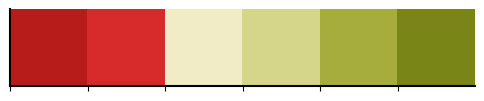

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

'''<<Personalization.>>'''

# graph personalization 
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["axes.facecolor"] ="white"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams["font.family"] = "monospace";

#color pallet and theme
import matplotlib.colors

colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

In [3]:
# Importar os pacotes necessários.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Clustering_Customers/main/data/CC%20GENERAL.csv")

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import Normalizer



# Tratamento dos dados

In [5]:
df_clean = df.copy()
# Eliminar colunas que não contém informações úteis para o modelo
df_clean = df_clean.drop(["CUST_ID" , "TENURE"], axis = 1)
df_clean.head()     

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


### Criando Pipeline para tratamento de missing

In [6]:

# Suponha que `df_clean` seja seu DataFrame

numeric_features = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()

# Defina os passos do pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação para valores numéricos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputação para valores categóricos usando a moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificação one-hot para variáveis categóricas
])

# Combinar etapas de pré-processamento para todos os tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # numeric_features são suas variáveis numéricas
        ('cat', categorical_transformer, categorical_features)  # categorical_features são suas variáveis categóricas
    ])

# Definir o pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Treino e Teste

In [7]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test = train_test_split(df_clean, test_size=0.33, random_state=42)

# Ajustar o pipeline aos dados de treinamento
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['BALANCE',
                                                   'BALANCE_FREQUENCY',
                                                   'PURCHASES',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'PURCHASES_FREQUENCY',
                                                   'ONEOFF_PURCHASES_FREQUENCY',
                                                   'PURCHASES_INSTALLMENTS_FREQUENCY',
                                                   'CASH_ADVANCE_FREQUENCY',
                                                   'CASH_ADVANCE_TRX',
                                                   'PURCHASES_TRX',
                                                   'CREDIT_LIMIT', 'PAYMENTS',
                                                   'MINIMUM_PAYMENTS',
                                                   'PRC_FULL_PAYMENT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])]))])

In [8]:
# Ajustar manualmente o OneHotEncoder aos dados de treinamento
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe.fit(X_train[categorical_features])

# Obter os nomes das colunas após a transformação
numeric_feature_names = numeric_features
categorical_feature_names = ohe.get_feature_names_out(input_features=categorical_features)
feature_names = numeric_feature_names + list(categorical_feature_names)

# Transformar os dados de treinamento e criar DataFrame com os nomes das colunas
Xtrain_processado = pipeline.transform(X_train)
Xtrain_processado_df = pd.DataFrame(Xtrain_processado, columns=feature_names)

In [9]:
Xtrain_processado_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,2447.624540,1.000000,116.16,26.16,90.00,729.174169,0.500000,0.083333,0.416667,0.083333,1.0,7.0,7500.0,525.469962,571.995314,0.000000
1,1369.504264,1.000000,1603.80,0.00,1603.80,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1300.0,1591.602315,1278.329537,0.000000
2,7293.108794,1.000000,0.00,0.00,0.00,1877.531533,0.000000,0.000000,0.000000,0.333333,4.0,0.0,8500.0,1816.195475,1659.404676,0.000000
3,299.765294,1.000000,2352.20,1136.70,1215.50,0.000000,0.916667,0.666667,0.750000,0.000000,0.0,30.0,6500.0,2671.279796,185.468819,0.250000
4,152.983848,0.375000,0.00,0.00,0.00,451.815934,0.000000,0.000000,0.000000,0.125000,1.0,0.0,1200.0,54.712966,123.051387,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,1079.097023,1.000000,247.44,0.00,247.44,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1200.0,503.445403,302.481716,0.000000
5992,833.541256,1.000000,0.00,0.00,0.00,1422.637361,0.000000,0.000000,0.000000,0.333333,8.0,0.0,2500.0,180.104404,282.085369,0.000000
5993,40.247238,0.181818,0.00,0.00,0.00,909.480894,0.000000,0.000000,0.000000,0.083333,2.0,0.0,1500.0,3578.648701,69.271137,1.000000
5994,0.000000,0.000000,199.88,0.00,199.88,0.000000,0.750000,0.000000,0.750000,0.000000,0.0,14.0,4000.0,0.000000,881.291043,0.000000


In [10]:
Xtrain_processado_df.isnull().sum() / Xtrain_processado_df.shape[0]

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
dtype: float64

In [11]:
df_clean = Xtrain_processado_df.copy()

- Padronização dos dados

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_clean)
df_clean_scaled = scaler.transform(df_clean)
print(df_clean_scaled)

[[ 0.40939658  0.51942193 -0.42222816 ... -0.42138097 -0.12379258
  -0.52550009]
 [-0.10048537  0.51942193  0.29545482 ... -0.05165373  0.15891076
  -0.52550009]
 [ 2.70100077  0.51942193 -0.4782673  ...  0.02623361  0.31143235
  -0.52550009]
 ...
 [-0.72913894 -2.92152691 -0.4782673  ...  0.63744007 -0.32500301
   2.89415184]
 [-0.74817331 -3.68618127 -0.38183908 ... -0.60361028  0.
  -0.52550009]
 [-0.49635008  0.51942193  1.09566237 ...  0.32686674 -0.28186418
   0.61438275]]


Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

$$
z = \frac{x - \mu}{\sigma}
$$

**A padronização é essencial na análise de clusters, uma vez que se compara a similaridade das features por meio das distâncias**. Note que na análise exploratória, vimos que cada uma das nossas features possuíam valores e escalas distintas, por esse motivo aplicamos a padronização, para as mesmas ficarem em uma mesma escala e não prejudicarem o desempenho do nosso modelo. 

## Modelo de clustering



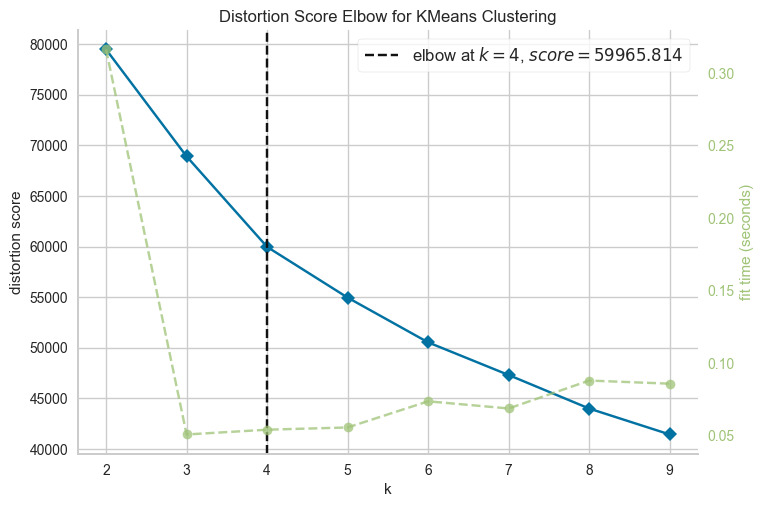

In [15]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_clean_scaled)
visualizer.show()
plt.show()


O que fizemos aqui foi rodar o KMeans diversas vezes, para vários números diferentes de clusters (Nesse caso foi de 2 a 10), e dizer qual dessas quantidades foi o número ótimo de clusters.

O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possíveis e que os agrupamentos formados sejam o mais diferentes um dos outros.

Mas como saber qual é esse ponto onde atingimos o número ótimo de clusters, de acordo com esse gráfico acima, por exemplo?

Vamos utilizar uma outra métrica de desempenho para nos ajudar nessa tarefa!

##  Outros critérios de validação

Conforme sabemos, um modelo de machine learning deve ser quantificável, seja em termos de desempenho ou precisão.

Avaliar o desempenho de um algoritmo de agrupamento não é tão trivial quanto contar o número de erros ou a precisão e recuperação de um algoritmo de classificação supervisionado. Em particular, qualquer métrica de avaliação não deve levar em consideração os valores absolutos dos rótulos do cluster, mas sim se esse cluster definir separações dos dados analisados. Essas separações devem satisfazer a algum conjunto de classes verdadeiras ou alguma suposição de modo que os membros pertençam à mesma classe de acordo com alguma métrica de similaridade.

No caso de modelos de clusterização, podemos testar o desempenho do modelo utilizando as seguintes métricas:

* Coeficiente de silhueta;
* Pontuação do davies bouldin;
* Pontuação do Calinski;

**Neste trabalho irei trabalhar apenas com o coeficiente de silhueta (além do método do cotovelo) para verificar o desempenho do nosso cluster.**

### Coeficiente de silhueta

O Coeficiente silhueta é calculado usando a distância média dentro do cluster (a) e a distância média do cluster mais próximo (b) para cada amostra.

Para esclarecer, é a distância entre uma amostra e o cluster mais próximo do qual a amostra não faz parte. 

Matematicamente, o coeficiente de silhueta é definido da seguinte forma:

$$
s = \frac{b - a}{max(a,b)}
$$

O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é "mais semelhante".

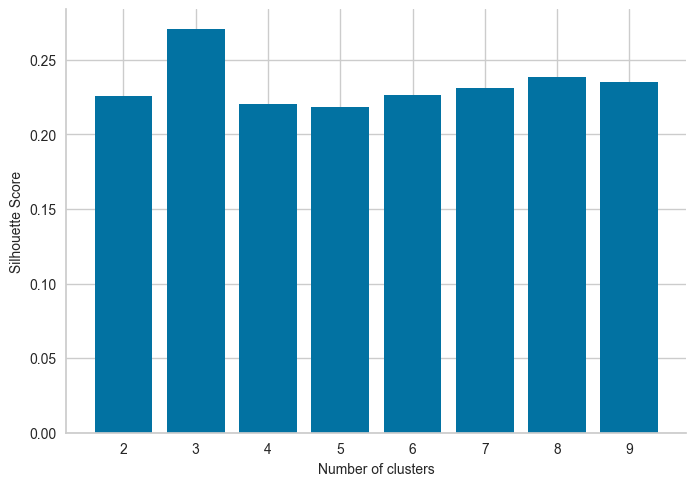

In [18]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_scaled, KMeans(n_clusters = n_cluster).fit_predict(df_clean_scaled))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

O melhor valor para o número de clusters foi 3. Apesar do valor do coeficiente de silhueta ter dado positivo (por volta de 0,25), ainda está um pouco distante do máximo ideal que seria 1,0. Podemos considerar esse valor bom, pois, foi apenas nosso primeiro teste utilizando o KMeans + standard scaler. 

Em projetos de machine learning tanto supervisionado quanto não supervisionado, devemos sempre fazer diversos testes com vários modelos de machine learning, vários modelos de pré-processamento e vários hyperparâmetros diferentes. É testando e avaliando que conseguimos melhorar nossos resultados.

### Teste 1 K-MEANS + Normalizer

In [20]:
df_clean_normalized = Normalizer().fit_transform(df_clean)
print(df_clean_normalized)

[[3.07401781e-01 1.25591885e-04 1.45887534e-02 ... 6.59947633e-02
  7.18379700e-02 0.00000000e+00]
 [3.81636526e-01 2.78667644e-04 4.46927167e-01 ... 4.43528067e-01
  3.56229080e-01 0.00000000e+00]
 [6.27651887e-01 8.60609522e-05 0.00000000e+00 ... 1.56303512e-01
  1.42809946e-01 0.00000000e+00]
 ...
 [1.00964793e-02 4.56111218e-05 0.00000000e+00 ... 8.97744899e-01
  1.73774559e-02 2.50861421e-04]
 [0.00000000e+00 0.00000000e+00 4.86835338e-02 ... 0.00000000e+00
  2.14650602e-01 0.00000000e+00]
 [8.01586065e-02 1.50541690e-04 4.91142262e-01 ... 4.03916975e-01
  2.66539323e-02 5.01805130e-05]]


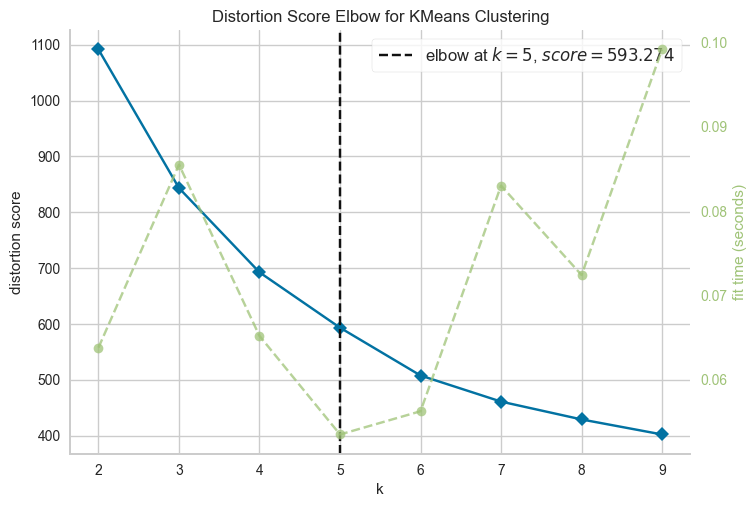

In [21]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_clean_normalized)
visualizer.show()
plt.show()


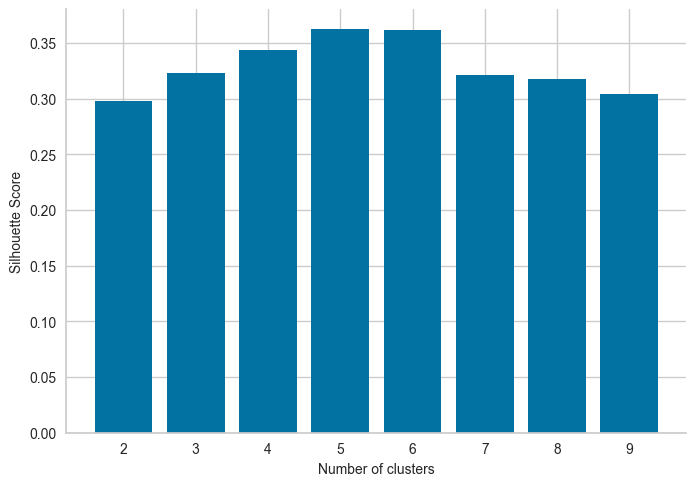

In [22]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_normalized, KMeans(n_clusters = n_cluster).fit_predict(df_clean_normalized))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### Teste 2 - Kmeans + PCA + StandardScaler

O PCA tem que ser utilizado combinado com um algoritmo de padronização/normalização dos dados. Aqui vamos testar utilizando os dois que já havíamos trabalhado.

In [30]:
from sklearn.decomposition import PCA

# Reduzindo as dimensões dos dados 
pca = PCA(n_components=2)
df_clean_pca1 = pca.fit_transform(df_clean_scaled) 
df_clean_pca1 = pd.DataFrame(df_clean_pca1) 
df_clean_pca1.columns = ['P1', 'P2'] 
  
df_clean_pca1.head()

,P1,P2
0,-0.497265,0.029317
1,0.984214,-1.317659
2,-1.208309,2.569168
3,2.376549,-1.100424
4,-2.274098,-0.788259


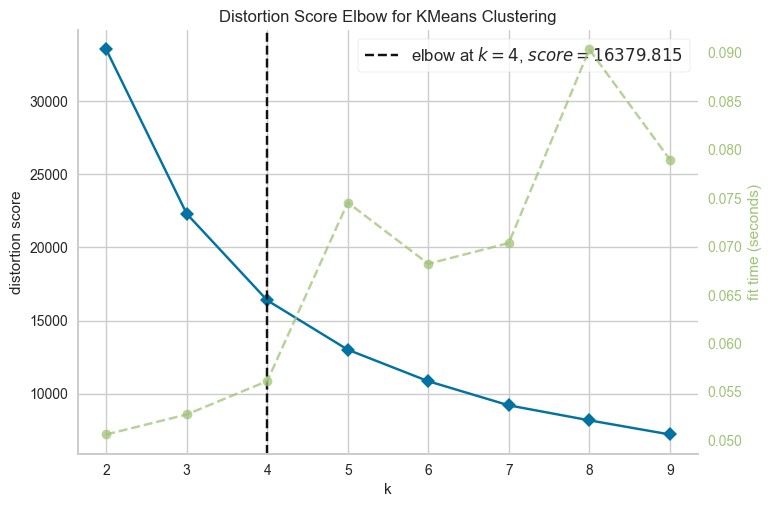

In [31]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_clean_pca1)
visualizer.show()
plt.show()

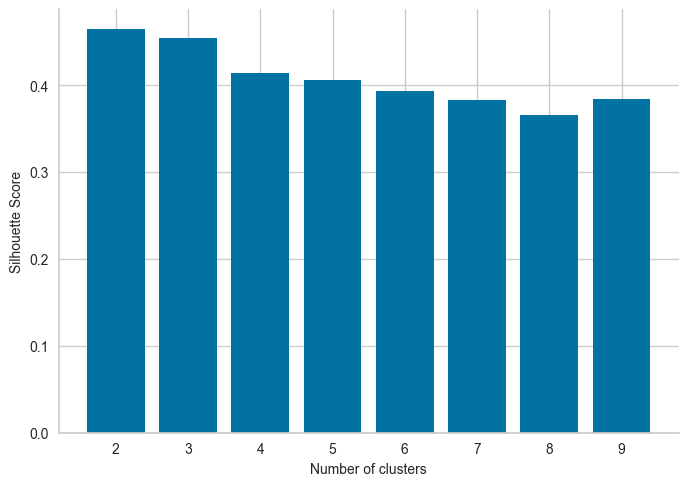

[0.4644653661015001, 0.4548679693810347, 0.41387322624139516, 0.40589163849489396, 0.3933849675477151, 0.3830871669638726, 0.36574308130930416, 0.38479890147362156]


In [33]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_pca1, KMeans(n_clusters = n_cluster).fit_predict(df_clean_pca1))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print(silhouette_scores)

### Teste 3 - KMeans + PCA + Normalizer

In [52]:
# Reduzindo as dimensões dos dados 
pca = PCA(n_components = 3) 
df_clean_pca2 = pca.fit_transform(df_clean_normalized) 
df_clean_pca2 = pd.DataFrame(df_clean_pca2) 
df_clean_pca2.columns = ['P1', 'P2', 'P3'] 
  
df_clean_pca2.head()

,P1,P2,P3
0,-0.169441,-0.281426,-0.020042
1,0.314369,0.408491,-0.320676
2,0.202506,-0.311798,-0.129069
3,-0.253068,0.252079,0.034593
4,-0.143049,-0.291251,0.203460


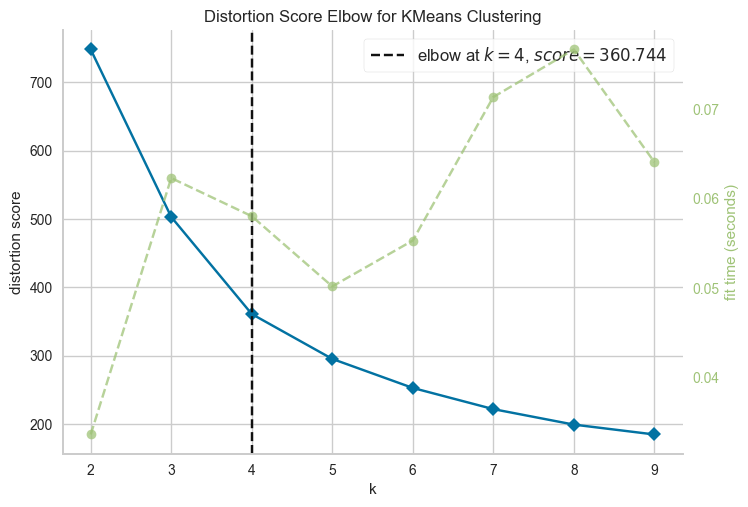

In [54]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_clean_pca2)
visualizer.show()
plt.show()

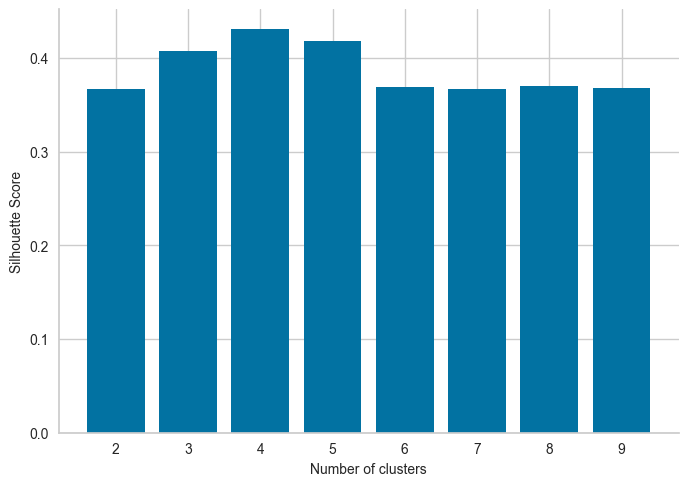

[0.36693066357713056, 0.4070867068640792, 0.43060784459415336, 0.4182979722384014, 0.36898895442034996, 0.3672597081938581, 0.3706860961801733, 0.36853292096154944]


In [55]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_pca2, KMeans(n_clusters = n_cluster).fit_predict(df_clean_pca2))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print(silhouette_scores)

### Teste 4 - DBSCAN + PCA + Normalizer

In [ ]:
# Reduzindo as dimensões dos dados 
pca = PCA(n_components = 2) 
df_clean_pca2 = pca.fit_transform(df_clean_normalized) 
df_clean_pca2 = pd.DataFrame(df_clean_pca2) 
df_clean_pca2.columns = ['P1', 'P2'] 
  
df_clean_pca2.head()

- Encontrando melhor eps e min sample

In [39]:
# Aplicação do algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_clean_pca2)

### Teste 5 - Agglomerative + PCA + Normalizer

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd


In [43]:
# Reduzindo as dimensões dos dados
pca = PCA(n_components=2)
df_clean_pca2 = pca.fit_transform(df_clean_normalized)
df_clean_pca2 = pd.DataFrame(df_clean_pca2)
df_clean_pca2.columns = ['P1', 'P2']


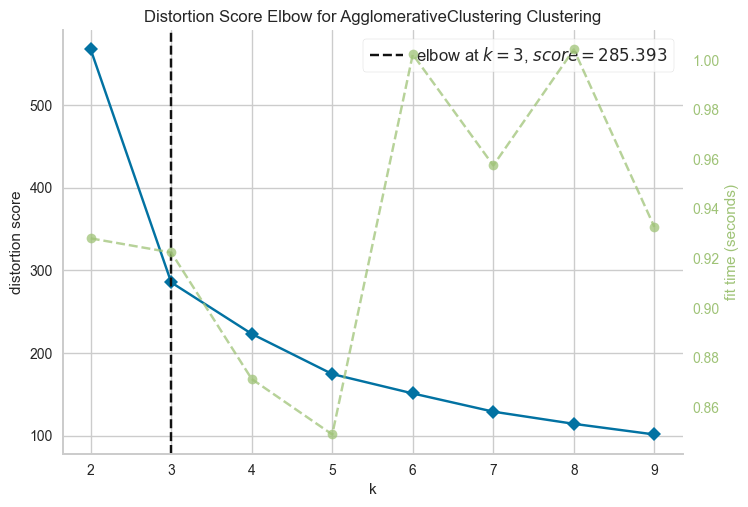

In [44]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(df_clean_pca2)
visualizer.show()
plt.show()

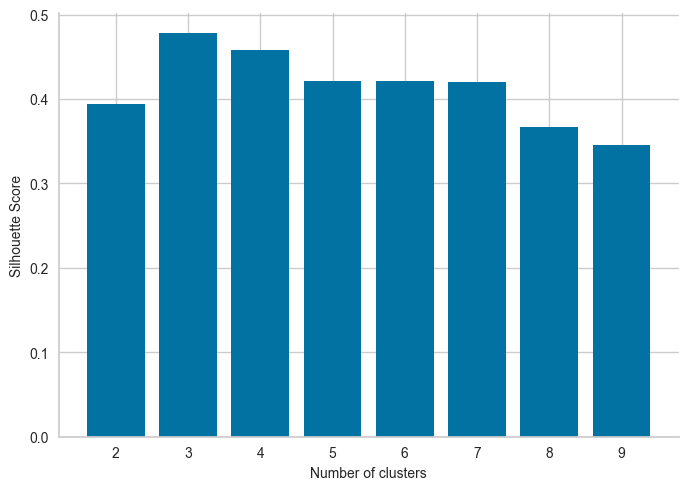

[0.394518509258286, 0.4777152049407555, 0.4578490431123356, 0.42098859496821706, 0.4218677174311317, 0.42027784397147433, 0.36625271647826557, 0.34583759667415226]


In [45]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = []

for n_cluster in range(2, 10):
    silhouette_scores.append(
        silhouette_score(df_clean_pca2, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(df_clean_pca2)))

# Plotando um gráfico para comparar os resultados
k = [2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()
print(silhouette_scores)

## Modelo final

Com todos os testes que foram propostos para esse trabalho feitos, vamos instanciar, treinar e fazer previsões com o modelo final adotado e tirar conclusões que definam alguma estratégia para o problema em questão.

In [46]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df_clean_pca2)

In [47]:
y_pred = y_pred.reshape(len(y_pred), 1)
b = np.concatenate((y_pred, df_clean), axis=1)
df_final = pd.DataFrame(data=b, columns=['Cluster_Num','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])
df_final.Cluster_Num.value_counts().sort_index()

0.0    2331
1.0    1246
2.0    2419
Name: Cluster_Num, dtype: int64

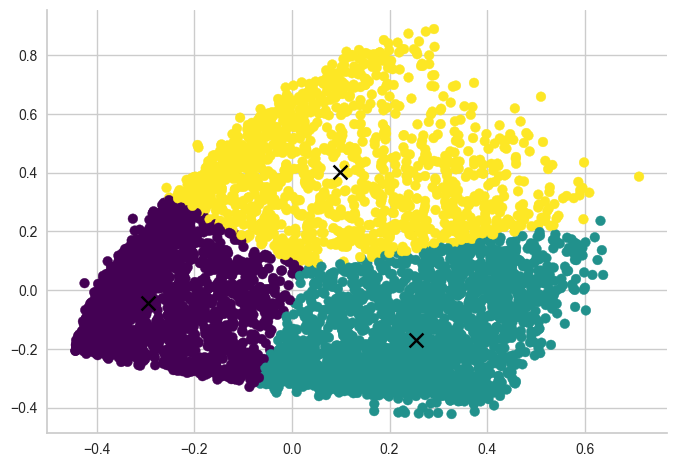

In [51]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_clean_pca2)

plt.scatter(df_clean_pca2['P1'], df_clean_pca2['P2'], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black')
plt.show()
